# Analysis of the Quantum Fischer Information (QFI) of pure states

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pathlib
from matplotlib import cm

from queso.io import IO

In [9]:
def load_data(io, ns, ks):
    data = {}
    for n in ns:
        _d = {}
        for k in ks:
            fid = io.path.joinpath(f'n={n}_k={k}.pkl')
            if fid.is_file():
                _df = io.load_dataframe(fid.stem)

                # fix datatype issues
                _df["fi"] = _df["fi"].astype('float64')

            else:
                _df = None

            _d[k] = _df
        data[n] = _d


    return data

# io = IO(folder=r"pure_qfi_batch_sweep/trapped_ion_ansatz/optimization", verbose=False)
io = IO(folder=r"pure_qfi_batch_sweep/cnot_2local_ansatz/optimization", verbose=False)
ns = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12]
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data = load_data(io, ns, ks)

In [10]:
for n in ns:
    for k in ks:
        df = data[n][k]
        print(f"n={n}, k={k} | {df.fi.max() if df is not None else 'NA'}")

n=1, k=1 | 0.9999958520690485
n=1, k=2 | 0.9999997372175955
n=1, k=3 | 0.999999619740112
n=1, k=4 | 0.9999996174971688
n=1, k=5 | 0.9999997568390335
n=1, k=6 | 0.9999999182221345
n=1, k=7 | 0.9999998691580131
n=1, k=8 | 0.9999999584773683
n=1, k=9 | 0.9999999926304063
n=1, k=10 | 0.9999998393890619
n=1, k=11 | 0.999999879976886
n=1, k=12 | 0.9999997854421132
n=2, k=1 | 3.9999926983784784
n=2, k=2 | 3.999999082600739
n=2, k=3 | 3.999999992818464
n=2, k=4 | 3.9999997739313673
n=2, k=5 | 3.9999999974634592
n=2, k=6 | 3.9999999941681983
n=2, k=7 | 3.999999999552785
n=2, k=8 | 3.9999999904944605
n=2, k=9 | 3.999999976942714
n=2, k=10 | 3.999999985098984
n=2, k=11 | 3.999999260922918
n=2, k=12 | 3.9999997377990217
n=3, k=1 | 8.999998954470561
n=3, k=2 | 8.999999743639561
n=3, k=3 | 8.999996190745112
n=3, k=4 | 8.999997458424783
n=3, k=5 | 8.999999468167584
n=3, k=6 | 8.99999999815852
n=3, k=7 | 8.999999999553273
n=3, k=8 | 8.999999999988617
n=3, k=9 | 8.999998895262262
n=3, k=10 | 8.99999999

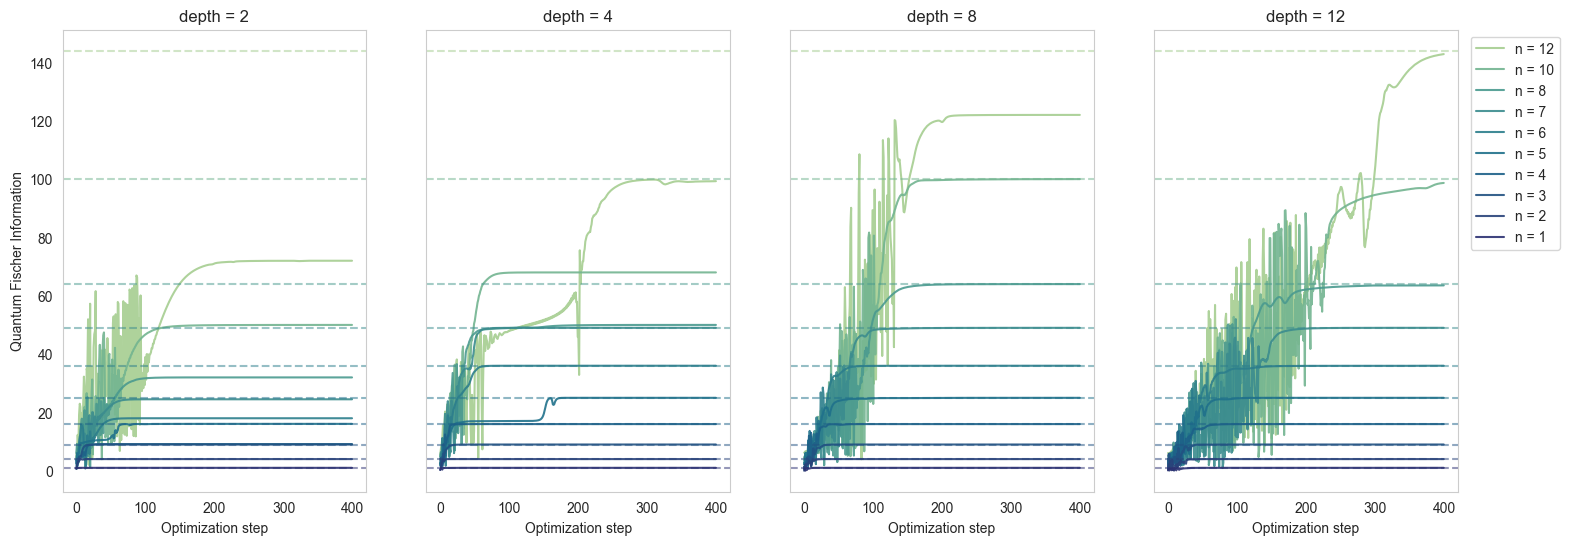

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=[18, 6], sharey=True)
colors = sns.color_palette("crest_r", as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

ks = (2, 4, 8, 12)
for ax, k in zip(axs, ks):
    for j, n in enumerate(reversed(ns)):
        color = colors(norm(n))

        ax.axhline(n**2, color=color, ls='--', alpha=0.5)

        df = data[n][k]
        if df is None:
            continue
        row = df.loc[df["fi"].idxmax()]

        ax.plot(row.loss, color=color, alpha=0.9, label=f"n = {n}")

    ax.set(xlabel="Optimization step", title=f"depth = {k}")
    if ax == axs[0]:
        ax.set(ylabel="Quantum Fischer Information")
    if ax == axs[-1]:
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1)
    ax.grid(None)
plt.show()

### How does the maximal FI change with circuit depth?


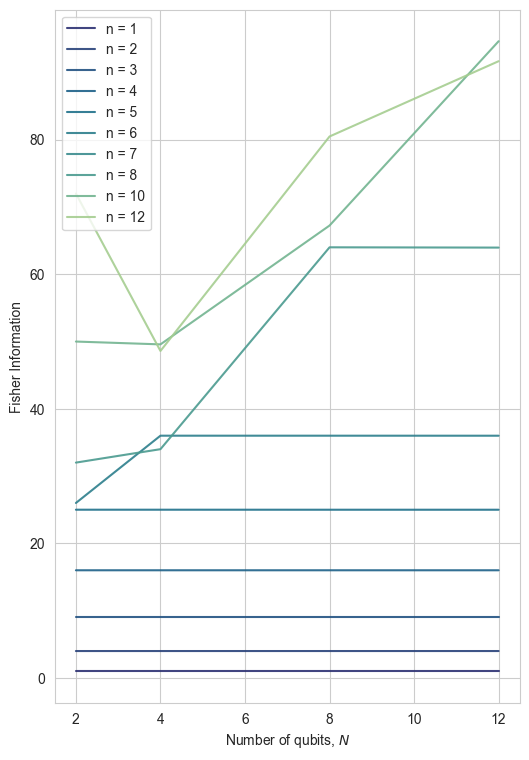

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6, 9])
colors = sns.color_palette("crest_r", as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

for i, n in enumerate(ns):
    x, qfi, qfi_min = [], [], []
    for k in ks:
        # color = colors[i]
        color = colors(norm(n))

        df = data[n][k]
        if df is None:
            continue
        x.append(k)
        qfi.append(df["fi"].max())
        qfi_min.append(df["fi"].min())

    ax.plot(x, qfi, color=color, alpha=0.9, label=f"n = {n}")
    # ax.fill_between(x, qfi, qfi_min, color=color, alpha=0.2)  #colors(norm(n))

ax.set(xlabel="Number of qubits, $N$", ylabel="Fisher Information")
ax.legend()
plt.show()

### Is there a critical depth where the FI can reach the known optimal values?

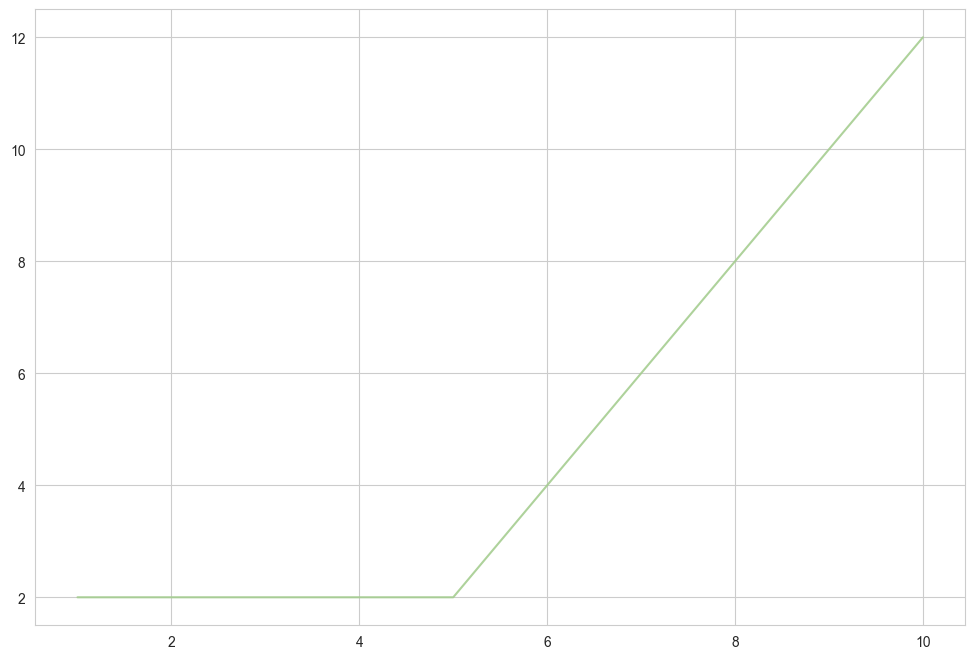

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12, 8])
colors = sns.color_palette("crest_r", as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))

x, min_k = [], []
for n in ns[:]:
    _t = 0
    for k in ks:
        df = data[n][k]
        if df is None:
            continue
        if np.abs(df["fi"].max() - n**2)/n**2 < 0.1:
            min_k.append(k)
            x.append(n)
            break

ax.plot(x, min_k, color=colors(norm(n)), alpha=0.9)
plt.show()